In [1]:
from envSetup import load_tag_pos
from mapSetup import create_grid_map, draw_grid, group_obstacles, plot_map, plot_path_on_map
import pathLib
import numpy as np
from Agent import BotAgent
import os
import cv2
from AprilLib import TagDetect


# intrinsic = np.array(([207.9138,0,315.9991],[0,206.5876,242.7096],[0,0,1]),dtype=np.double)
intrinsic = np.array(([231.9820,0,320.0860],[0,233.9877,241.3670],[0,0,1]),dtype=np.double)

# distortion = np.array([0.2345,-0.1114,0,0],dtype=np.double)
distortion = np.array([0.0531,-0.0363,0,0],dtype=np.double)

tag_poses, centers, screens = load_tag_pos()
grid = create_grid_map(centers)
tg = TagDetect(tag_poses, intrinsic, distortion)

In [2]:
from pynq import Overlay
from pynq import Xlnk
import pynq.lib.dma
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
def my_transform(img):
    #img2 = np.resize(img, (28,28))
    im_data = np.array(img).astype(np.float32)
    im_data = im_data.transpose(2,0,1)
    for i in range(im_data.shape[0]):
        im_data[i,:,:] = (im_data[i,:,:] - np.mean(im_data[i,:,:])) / np.std(im_data[i,:,:])
    return im_data

In [4]:
Classes = ['bailianhua',
 'chuju',
 'hehua',
 'juhua',
 'lamei',
 'lanhua',
 'meiguihua',
 'shuixianhua',
 'taohua',
 'yinghua',
 'yuanweihua',
 'zijinghua']
iter = 213

In [5]:
overlay = Overlay('overlay/enhanced.bit')

xlnk = Xlnk()
xxx = xlnk.cma_array(shape=(3,28,28), dtype=np.float32)
yyy = xlnk.cma_array(shape=(12), dtype=np.float32)

input_ch = overlay.axi_dma_0.sendchannel
output_ch = overlay.axi_dma_0.recvchannel

(28, 28, 3)


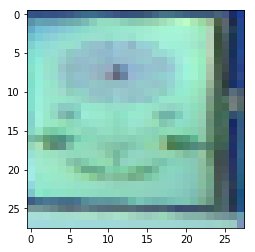

y [ 0.72754556 10.937271   -1.7227235  -0.96444863 -1.4898596  -5.00444
 -4.5251403   1.8163536   0.20442395 -2.130592   -3.031579   -3.6926525 ]
id:24 pred class: chuju
(28, 28, 3)


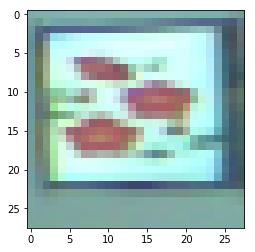

y [  1.5655075   8.7573805  -8.807138   -3.2747018   8.793383  -14.100994
  -8.198654   -7.757498    7.3981695  -5.2314086  -3.1495056   0.2606848]
id:26 pred class: lamei
(28, 28, 3)


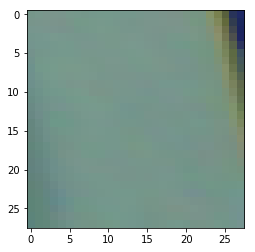

y [  4.081973    8.4858265 -15.158458   -6.804456   16.786604  -22.519665
 -12.734894  -16.697563   14.495966   -8.215873   -4.377711    4.3869333]
id:34 pred class: lamei


In [6]:
overlay = Overlay('overlay/enhanced.bit')
import time



h = cv2.VideoCapture(0)
ret, f = h.read()
h.release()
f = cv2.cvtColor(f, cv2.COLOR_BGR2RGB)
res = tg.detect(f)
for tag in res:
    if tag.tag_id <= 36:
        _, rvec, tvec = cv2.solvePnP(tg.tagStandard[str(tag.tag_id)], tag.corners, tg.intrinsic, tg.distortion)
        R, _ = cv2.Rodrigues(rvec)
        point2d, _ = cv2.projectPoints(screens[tag.tag_id], R, tvec, intrinsic, distortion)
        pts1 = point2d.astype(np.float32)
        pts2 = np.array([[0, 0], [27, 0], [27, 27], [0, 27]], dtype=np.float32)
        M = cv2.getPerspectiveTransform(pts1, pts2)
        result = cv2.warpPerspective(f, M, (28, 28))
        xlnk = Xlnk()
        xxx = xlnk.cma_array(shape=(3,28,28), dtype=np.float32)
        yyy = xlnk.cma_array(shape=(12), dtype=np.float32)

        input_ch = overlay.axi_dma_0.sendchannel
        output_ch = overlay.axi_dma_0.recvchannel
        print(result.shape)
        plt.imshow(result)
        plt.show()
        img_data = my_transform(result)
        for i in range(3):
            for j in range(28):
                for k in range(28):
                    xxx[i][j][k] = img_data[i][j][k]
                    
        input_ch.transfer(xxx)
        output_ch.transfer(yyy)
        output_ch.wait()
        print('y', yyy)
        print(f'id:{tag.tag_id} pred class: {Classes[np.argmax(yyy)]}')
        time.sleep(2)
        #cv2.imwrite(f"meiguihua{iter}.jpg", result)
        iter += 1
    else:
        continue

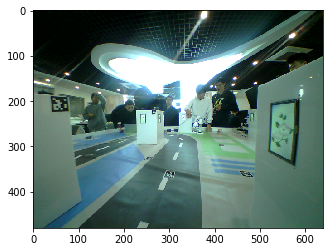

In [17]:
h = cv2.VideoCapture(0)
ret, f = h.read()
f = cv2.cvtColor(f, cv2.COLOR_BGR2RGB)
h.release()
plt.imshow(f)
plt.show()

In [1]:
!tar -czvf train1129.tar.gz *.jpg

bailianhua105.jpg
bailianhua106.jpg
bailianhua107.jpg
bailianhua108.jpg
bailianhua109.jpg
bailianhua110.jpg
bailianhua111.jpg
bailianhua112.jpg
bailianhua113.jpg
chuju120.jpg
chuju121.jpg
chuju122.jpg
chuju123.jpg
chuju124.jpg
chuju125.jpg
chuju126.jpg
chuju127.jpg
juhua114.jpg
juhua115.jpg
juhua116.jpg
juhua117.jpg
juhua118.jpg
juhua119.jpg
lamei0.jpg
lamei1.jpg
lamei10.jpg
lamei11.jpg
lamei12.jpg
lamei13.jpg
lamei14.jpg
lamei2.jpg
lamei3.jpg
lamei4.jpg
lamei5.jpg
lamei6.jpg
lamei7.jpg
lamei8.jpg
lamei9.jpg
lanhua100.jpg
lanhua101.jpg
lanhua102.jpg
lanhua103.jpg
lanhua104.jpg
lanhua16.jpg
lanhua17.jpg
lanhua18.jpg
lanhua19.jpg
meiguihua157.jpg
meiguihua158.jpg
meiguihua159.jpg
meiguihua160.jpg
meiguihua161.jpg
meiguihua162.jpg
meiguihua163.jpg
shuixianhua150.jpg
shuixianhua151.jpg
shuixianhua152.jpg
shuixianhua153.jpg
shuixianhua154.jpg
shuixianhua155.jpg
shuixianhua156.jpg
taohua164.jpg
taohua165.jpg
taohua166.jpg
taohua167.jpg
taohua168.jpg
taohua169.jpg
taohua170.jpg
taohua171.jpg
